In [1]:
import keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Setting seed for reproducability
np.random.seed(1234)  
PYTHONHASHSEED = 0
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation
%matplotlib inline

In [3]:
from pykalman import KalmanFilter

In [4]:
from keras.layers import Bidirectional

# DATA PREPOCESSING (DATASET- FD001)

In [5]:
train_df= pd.read_csv(r"C:\FSM_NASA\train_FD001.csv")
# Drop columns based on column index.
train_df= train_df.drop(train_df.columns[[26]],axis = 1)
train_df.head() 

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044


In [6]:
train_df.shape

(20631, 26)

In [7]:
#setting the column names
train_df.columns=["engineNumber","cycleNumber","opSetting1","opSetting2","opSetting3","sensor1","sensor2", "sensor3","sensor4","sensor5","sensor6",
"sensor7","sensor8","sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16", "sensor17",
"sensor18","sensor19","sensor20","sensor21"]
train_df

,engineNumber,cycleNumber,opSetting1,opSetting2,opSetting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100,38.30,23.1594
20628,100,198,0.0004,0.0000,100,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100,38.44,22.9333
20629,100,199,-0.0011,0.0003,100,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100,38.29,23.0640


In [8]:
#checking for Null values
train_df.isnull().sum()

engineNumber    0
cycleNumber     0
opSetting1      0
opSetting2      0
opSetting3      0
sensor1         0
sensor2         0
sensor3         0
sensor4         0
sensor5         0
sensor6         0
sensor7         0
sensor8         0
sensor9         0
sensor10        0
sensor11        0
sensor12        0
sensor13        0
sensor14        0
sensor15        0
sensor16        0
sensor17        0
sensor18        0
sensor19        0
sensor20        0
sensor21        0
dtype: int64

In [9]:
train_df.describe()

,engineNumber,cycleNumber,opSetting1,opSetting2,opSetting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [10]:
train_df.nunique(axis=0)  

engineNumber     100
cycleNumber      362
opSetting1       158
opSetting2        13
opSetting3         1
sensor1            1
sensor2          310
sensor3         3012
sensor4         4051
sensor5            1
sensor6            2
sensor7          513
sensor8           53
sensor9         6403
sensor10           1
sensor11         159
sensor12         427
sensor13          56
sensor14        6078
sensor15        1918
sensor16           1
sensor17          13
sensor18           1
sensor19           1
sensor20         120
sensor21        4745
dtype: int64

In [11]:
train_df.dtypes

engineNumber      int64
cycleNumber       int64
opSetting1      float64
opSetting2      float64
opSetting3        int64
sensor1         float64
sensor2         float64
sensor3         float64
sensor4         float64
sensor5         float64
sensor6         float64
sensor7         float64
sensor8         float64
sensor9         float64
sensor10        float64
sensor11        float64
sensor12        float64
sensor13        float64
sensor14        float64
sensor15        float64
sensor16        float64
sensor17          int64
sensor18          int64
sensor19          int64
sensor20        float64
sensor21        float64
dtype: object

In [12]:
train_df = train_df.sort_values(['engineNumber','cycleNumber'])
train_df.head()

,engineNumber,cycleNumber,opSetting1,opSetting2,opSetting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044


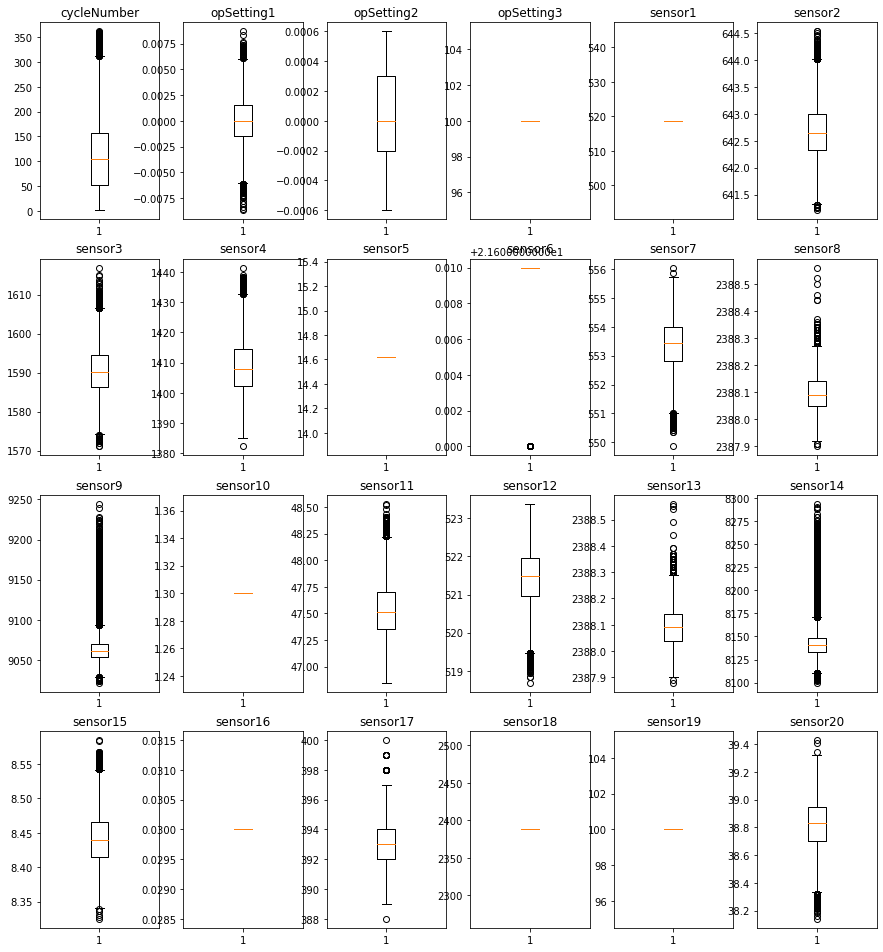

In [13]:
plt.figure(figsize = (15, 21))
for i in np.arange(1, 25):        # column 5 in python means actual 6th column
  temp = train_df.iloc[:, i]
  plt.subplot(5,6, i)
  plt.boxplot(temp)           # Make a box and whisker plot.
  plt.title(train_df.columns[i])
plt.show()

from the box plot we can observe that the plots with constant represents the varaibles that poor dependency of the respective varaibles with the dataset.the varaibles are 'sensor1', 'sensor5','sensor6','sensor10','sensor16','sensor18','sensor19','opSetting3

In [14]:
for cols in train_df.columns:
    if cols == 'engineNumber':
        continue;
    if cols == 'cycleNumber':
        continue;
    else:
        print(cols)
        kf = KalmanFilter(transition_matrices = [1],
                      observation_matrices = [1],
                      initial_state_mean = train_df[cols].values[0],
                      initial_state_covariance = 1,
                      observation_covariance=1,
                      transition_covariance=.01)
        state_means,_ = kf.filter(train_df[cols].values)
        train_df[cols] = state_means.flatten()

opSetting1
opSetting2
opSetting3
sensor1
sensor2
sensor3
sensor4
sensor5
sensor6
sensor7
sensor8
sensor9
sensor10
sensor11
sensor12
sensor13
sensor14
sensor15
sensor16
sensor17
sensor18
sensor19
sensor20
sensor21


In [15]:
test_df= pd.read_csv(r"C:\FSM_NASA\test_FD001.csv")
# Drop columns based on column index.
test_df= test_df.drop(test_df.columns[[26]],axis = 1)
test_df.columns=["engineNumber","cycleNumber","opSetting1","opSetting2","opSetting3","sensor1","sensor2", "sensor3","sensor4","sensor5","sensor6",
"sensor7","sensor8","sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16", "sensor17",
"sensor18","sensor19","sensor20","sensor21"]
test_df.head()  

,engineNumber,cycleNumber,opSetting1,opSetting2,opSetting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,0.0023,0.0003,100,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100,38.86,23.3735
1,1,2,-0.0027,-0.0003,100,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100,39.02,23.3916
2,1,3,0.0003,0.0001,100,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100,39.08,23.4166
3,1,4,0.0042,0.0000,100,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100,39.00,23.3737
4,1,5,0.0014,0.0000,100,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100,38.99,23.4130


In [16]:
truth_df= pd.read_csv(r"C:\FSM_NASA\RUL_FD001.csv")  
truth_df= truth_df.drop(truth_df.columns[[1]],axis = 1)
truth_df.head()

,Column1
0,112
1,98
2,69
3,82
4,91


In [17]:
for cols in test_df.columns:
    if cols == 'engineNumber':
        continue;
    if cols == 'cycleNumber':
        continue;
    else:
        print(cols)
        kf = KalmanFilter(transition_matrices = [1],
                      observation_matrices = [1],
                      initial_state_mean = test_df[cols].values[0],
                      initial_state_covariance = 1,
                      observation_covariance=1,
                      transition_covariance=.01)
        state_means,_ = kf.filter(test_df[cols].values)
        test_df[cols] = state_means.flatten()

opSetting1
opSetting2
opSetting3
sensor1
sensor2
sensor3
sensor4
sensor5
sensor6
sensor7
sensor8
sensor9
sensor10
sensor11
sensor12
sensor13
sensor14
sensor15
sensor16
sensor17
sensor18
sensor19
sensor20
sensor21


In [18]:
# observing the maximum cycle of each engine
max_cycles_df = train_df.groupby(["engineNumber"], sort=False)["cycleNumber"].max().reset_index().rename(columns={"CyclecycleNumber" : "MaxCycle_engineNumber"})
max_cycles_df

,engineNumber,cycleNumber
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269
...,...,...
95,96,336
96,97,202
97,98,156
98,99,185


RUL = EOL - Cycle

RUL = Remaining Useful Life

EOL = End of Life in cycles

In [19]:
#CALCULATING THE END LIFE OF EACH ENGINE
EOL=[]
for sl_no in train_df['engineNumber']:
       EOL.append( ((train_df[train_df['engineNumber'] == sl_no]["cycleNumber"]).values)[-1]) 

In [20]:
#FINDING THE EOL OF THE FIRST ENGINE TO VERIFY THE MAX_CYCLES DATAFRAME
((train_df[train_df['engineNumber'] == 1]["cycleNumber"]).values)[-1]

192

THE FINDINGS OF THE ENGINE 1 EOL SEEMS TO RELATE WITH THE MAX_CYCLES DATAFRAME

In [21]:
#FINDING THE SHAPE OF THE E0L
np.shape(EOL)

(20631,)

the shape of the EOL corresponds to the total number of rows

In [22]:
#as we have evaluated the EOL for its truthfulness of the data, now we can combine EOL into our train dataframe
train_df["EOL"]=EOL
train_df.head()

,engineNumber,cycleNumber,opSetting1,opSetting2,opSetting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,EOL
0,1,1,-0.000700,-0.000400,100.0,518.67,641.820000,1589.700000,1400.600000,14.62,...,2388.020000,8138.620000,8.419500,0.03,392.000000,2388.0,100.0,39.060000,23.419000,192
1,1,2,0.000178,-0.000366,100.0,518.67,641.931457,1590.416026,1401.457881,14.62,...,2388.036887,8136.211854,8.423654,0.03,392.000000,2388.0,100.0,39.039735,23.420554,192
2,1,3,-0.000977,-0.000194,100.0,518.67,642.039450,1589.790059,1402.165407,14.62,...,2388.035110,8135.442471,8.422144,0.03,391.483957,2388.0,100.0,39.016581,23.400853,192
3,1,4,-0.000623,-0.000153,100.0,518.67,642.105091,1588.310457,1402.102967,14.62,...,2388.044599,8135.101643,8.410742,0.03,391.593033,2388.0,100.0,38.987712,23.395156,192
4,1,5,-0.000854,-0.000162,100.0,518.67,642.153105,1587.320764,1402.849168,14.62,...,2388.043765,8134.865724,8.414123,0.03,391.848042,2388.0,100.0,38.971815,23.396831,192


In [23]:
train_df["RUL"] = train_df["EOL"]-train_df["cycleNumber"]
train_df = train_df.drop(columns=['EOL'])
train_df

,engineNumber,cycleNumber,opSetting1,opSetting2,opSetting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL
0,1,1,-0.000700,-0.000400,100.0,518.67,641.820000,1589.700000,1400.600000,14.62,...,2388.020000,8138.620000,8.419500,0.03,392.000000,2388.0,100.0,39.060000,23.419000,191
1,1,2,0.000178,-0.000366,100.0,518.67,641.931457,1590.416026,1401.457881,14.62,...,2388.036887,8136.211854,8.423654,0.03,392.000000,2388.0,100.0,39.039735,23.420554,190
2,1,3,-0.000977,-0.000194,100.0,518.67,642.039450,1589.790059,1402.165407,14.62,...,2388.035110,8135.442471,8.422144,0.03,391.483957,2388.0,100.0,39.016581,23.400853,189
3,1,4,-0.000623,-0.000153,100.0,518.67,642.105091,1588.310457,1402.102967,14.62,...,2388.044599,8135.101643,8.410742,0.03,391.593033,2388.0,100.0,38.987712,23.395156,188
4,1,5,-0.000854,-0.000162,100.0,518.67,642.153105,1587.320764,1402.849168,14.62,...,2388.043765,8134.865724,8.414123,0.03,391.848042,2388.0,100.0,38.971815,23.396831,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.000073,0.000004,100.0,518.67,643.393265,1598.809003,1424.458174,14.62,...,2388.223350,8141.264573,8.505021,0.03,395.604953,2388.0,100.0,38.478781,23.112403,4
20627,100,197,-0.000218,-0.000044,100.0,518.67,643.407223,1599.350359,1425.325887,14.62,...,2388.223031,8140.811343,8.505866,0.03,395.547407,2388.0,100.0,38.461774,23.116873,3
20628,100,198,-0.000159,-0.000039,100.0,518.67,643.408438,1599.646163,1425.597385,14.62,...,2388.224646,8140.834045,8.511453,0.03,395.780710,2388.0,100.0,38.459703,23.099411,2
20629,100,199,-0.000249,-0.000007,100.0,518.67,643.391465,1600.180179,1425.686100,14.62,...,2388.225155,8140.687168,8.514064,0.03,395.706445,2388.0,100.0,38.443560,23.096043,1


now we have found the RUL of the engines

In [24]:
# generate label columns for training data
w1 = 30
w0 = 15
train_df['label1'] = np.where(train_df['RUL'] <= w1, 1, 0 )
train_df['label2'] = train_df['label1']
train_df.loc[train_df['RUL'] <= w0, 'label2'] = 2
train_df.head()

,engineNumber,cycleNumber,opSetting1,opSetting2,opSetting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL,label1,label2
0,1,1,-0.000700,-0.000400,100.0,518.67,641.820000,1589.700000,1400.600000,14.62,...,8.419500,0.03,392.000000,2388.0,100.0,39.060000,23.419000,191,0,0
1,1,2,0.000178,-0.000366,100.0,518.67,641.931457,1590.416026,1401.457881,14.62,...,8.423654,0.03,392.000000,2388.0,100.0,39.039735,23.420554,190,0,0
2,1,3,-0.000977,-0.000194,100.0,518.67,642.039450,1589.790059,1402.165407,14.62,...,8.422144,0.03,391.483957,2388.0,100.0,39.016581,23.400853,189,0,0
3,1,4,-0.000623,-0.000153,100.0,518.67,642.105091,1588.310457,1402.102967,14.62,...,8.410742,0.03,391.593033,2388.0,100.0,38.987712,23.395156,188,0,0
4,1,5,-0.000854,-0.000162,100.0,518.67,642.153105,1587.320764,1402.849168,14.62,...,8.414123,0.03,391.848042,2388.0,100.0,38.971815,23.396831,187,0,0


In [25]:
# MinMax normalization
train_df['cycle_norm'] = train_df['cycleNumber']
cols_normalize = train_df.columns.difference(['engineNumber','cycleNumber','RUL','label1','label2'])
min_max_scaler = preprocessing.MinMaxScaler()
norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(train_df[cols_normalize]), 
                             columns=cols_normalize, 
                             index=train_df.index)
join_df = train_df[train_df.columns.difference(cols_normalize)].join(norm_train_df)
train_df = join_df.reindex(columns = train_df.columns)
train_df.head()

,engineNumber,cycleNumber,opSetting1,opSetting2,opSetting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL,label1,label2,cycle_norm
0,1,1,0.368542,0.000000,0.0,0.0,0.000000,0.349894,0.185846,0.0,...,0.0,0.184954,0.0,0.0,0.938255,0.901462,191,0,0,0.00000
1,1,2,0.606362,0.045503,0.0,0.0,0.058599,0.381941,0.211315,0.0,...,0.0,0.184954,0.0,0.0,0.907757,0.905421,190,0,0,0.00277
2,1,3,0.293440,0.277092,0.0,0.0,0.115377,0.353925,0.232320,0.0,...,0.0,0.092264,0.0,0.0,0.872911,0.855227,189,0,0,0.00554
3,1,4,0.389455,0.332429,0.0,0.0,0.149888,0.287703,0.230467,0.0,...,0.0,0.111856,0.0,0.0,0.829464,0.840712,188,0,0,0.00831
4,1,5,0.326762,0.321014,0.0,0.0,0.175131,0.243408,0.252620,0.0,...,0.0,0.157660,0.0,0.0,0.805538,0.844981,187,0,0,0.01108


In [26]:
test_df['cycle_norm'] = test_df['cycleNumber']
norm_test_df = pd.DataFrame(min_max_scaler.transform(test_df[cols_normalize]), 
                            columns=cols_normalize, 
                            index=test_df.index)
test_join_df = test_df[test_df.columns.difference(cols_normalize)].join(norm_test_df)
test_df = test_join_df.reindex(columns = test_df.columns)
test_df = test_df.reset_index(drop=True)
test_df.head()

,engineNumber,cycleNumber,opSetting1,opSetting2,opSetting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,cycle_norm
0,1,1,1.181006,0.943062,0.0,0.0,0.630905,0.152518,0.114891,0.0,...,0.162801,0.121627,0.161653,0.0,0.184954,0.0,0.0,0.637261,0.785538,0.00000
1,1,2,0.723659,0.670047,0.0,0.0,0.398285,0.200286,0.086915,0.0,...,0.194081,0.152988,0.100639,0.0,0.245620,0.0,0.0,0.718589,0.801113,0.00277
2,1,3,0.701909,0.670968,0.0,0.0,0.382339,0.207015,0.118110,0.0,...,0.186010,0.152644,0.189200,0.0,0.276312,0.0,0.0,0.783034,0.825428,0.00554
3,1,4,0.911938,0.643051,0.0,0.0,0.370424,0.184428,0.168949,0.0,...,0.194155,0.156341,0.162675,0.0,0.219036,0.0,0.0,0.796756,0.817104,0.00831
4,1,5,0.916529,0.624173,0.0,0.0,0.369036,0.194057,0.179114,0.0,...,0.188472,0.154822,0.159729,0.0,0.147749,0.0,0.0,0.803308,0.829623,0.01108


In [27]:
# generate column max for test data
rul = pd.DataFrame(test_df.groupby('engineNumber')['cycleNumber'].max()).reset_index()
rul.columns = ['engineNumber', 'max']
truth_df.columns = ['more']
truth_df['engineNumber'] = truth_df.index + 1
truth_df['max'] = rul['max'] + truth_df['more']
truth_df.drop('more', axis=1, inplace=True)

In [28]:
# generate RUL for test data
test_df = test_df.merge(truth_df, on=['engineNumber'], how='left')
test_df['RUL'] = test_df['max'] - test_df['cycleNumber']
test_df.drop('max', axis=1, inplace=True)
test_df.head()

,engineNumber,cycleNumber,opSetting1,opSetting2,opSetting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,cycle_norm,RUL
0,1,1,1.181006,0.943062,0.0,0.0,0.630905,0.152518,0.114891,0.0,...,0.121627,0.161653,0.0,0.184954,0.0,0.0,0.637261,0.785538,0.00000,142
1,1,2,0.723659,0.670047,0.0,0.0,0.398285,0.200286,0.086915,0.0,...,0.152988,0.100639,0.0,0.245620,0.0,0.0,0.718589,0.801113,0.00277,141
2,1,3,0.701909,0.670968,0.0,0.0,0.382339,0.207015,0.118110,0.0,...,0.152644,0.189200,0.0,0.276312,0.0,0.0,0.783034,0.825428,0.00554,140
3,1,4,0.911938,0.643051,0.0,0.0,0.370424,0.184428,0.168949,0.0,...,0.156341,0.162675,0.0,0.219036,0.0,0.0,0.796756,0.817104,0.00831,139
4,1,5,0.916529,0.624173,0.0,0.0,0.369036,0.194057,0.179114,0.0,...,0.154822,0.159729,0.0,0.147749,0.0,0.0,0.803308,0.829623,0.01108,138


In [29]:
# generate label columns w0 and w1 for test data
test_df['label1'] = np.where(test_df['RUL'] <= w1, 1, 0 )
test_df['label2'] = test_df['label1']
test_df.loc[test_df['RUL'] <= w0, 'label2'] = 2
test_df.head()

,engineNumber,cycleNumber,opSetting1,opSetting2,opSetting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,cycle_norm,RUL,label1,label2
0,1,1,1.181006,0.943062,0.0,0.0,0.630905,0.152518,0.114891,0.0,...,0.0,0.184954,0.0,0.0,0.637261,0.785538,0.00000,142,0,0
1,1,2,0.723659,0.670047,0.0,0.0,0.398285,0.200286,0.086915,0.0,...,0.0,0.245620,0.0,0.0,0.718589,0.801113,0.00277,141,0,0
2,1,3,0.701909,0.670968,0.0,0.0,0.382339,0.207015,0.118110,0.0,...,0.0,0.276312,0.0,0.0,0.783034,0.825428,0.00554,140,0,0
3,1,4,0.911938,0.643051,0.0,0.0,0.370424,0.184428,0.168949,0.0,...,0.0,0.219036,0.0,0.0,0.796756,0.817104,0.00831,139,0,0
4,1,5,0.916529,0.624173,0.0,0.0,0.369036,0.194057,0.179114,0.0,...,0.0,0.147749,0.0,0.0,0.803308,0.829623,0.01108,138,0,0


In [30]:
train_df.drop(['label1','label2'],axis=1,inplace=True)
test_df.drop(['label1','label2'],axis=1,inplace=True)

In [31]:
# pick a large window size of 50 cycles
sequence_length = 50

In [32]:
# preparing data for visualizations 
# window of 50 cycles prior to a failure point for engine id 3
engine_id3 = test_df[test_df['engineNumber'] == 3]
engine_id3_50cycleWindow = engine_id3[engine_id3['RUL'] <= engine_id3['RUL'].min() + 50]
cols1 = ['sensor1', 'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor10']
engine_id3_50cycleWindow1 = engine_id3_50cycleWindow[cols1]
cols2 = ['sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor16', 'sensor17', 'sensor18', 'sensor19', 'sensor20', 'sensor21']
engine_id3_50cycleWindow2 = engine_id3_50cycleWindow[cols2]

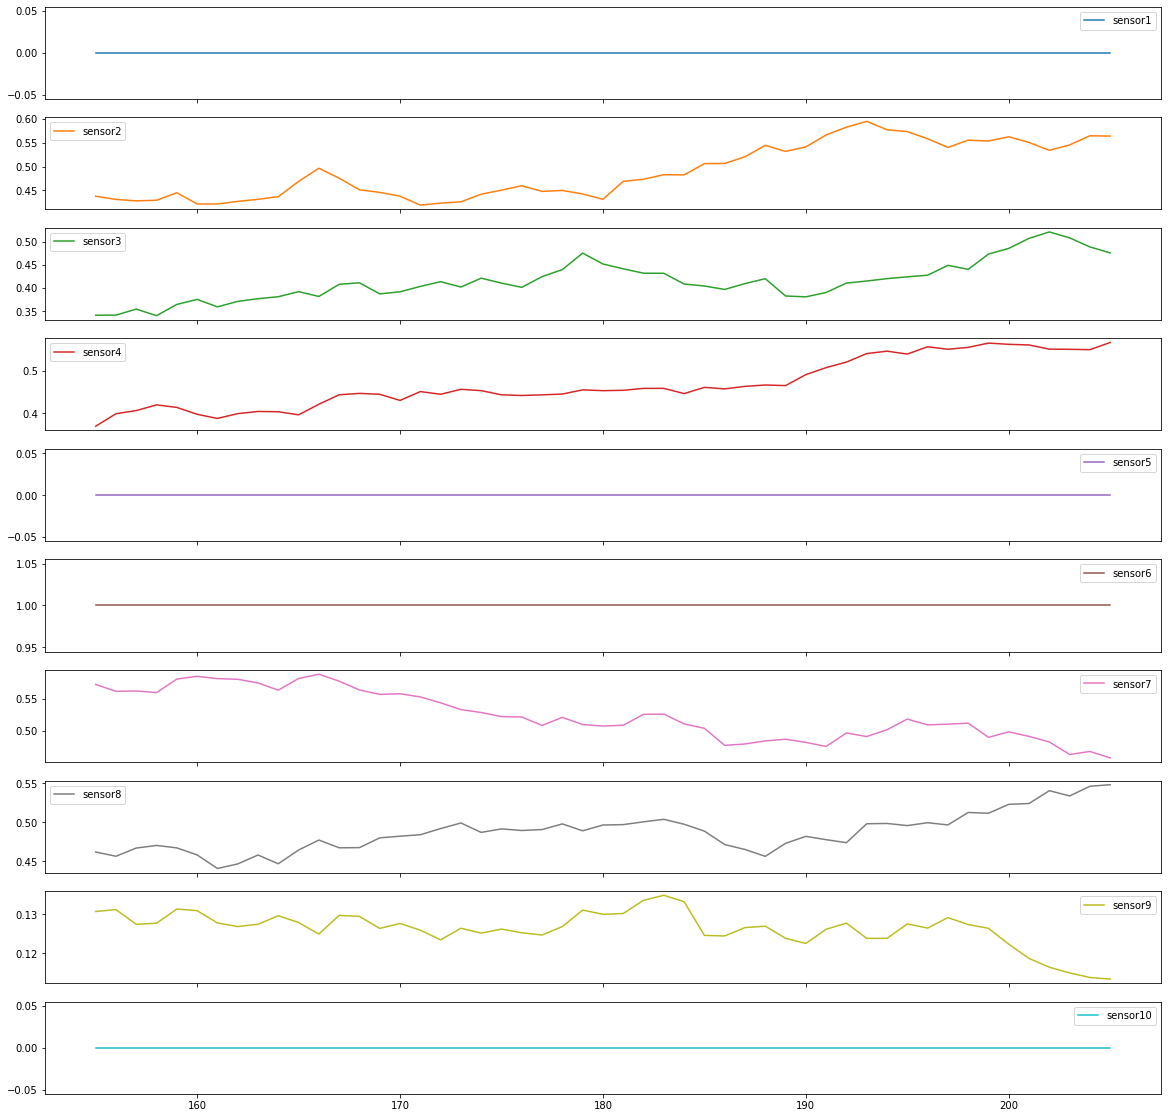

In [33]:
# plotting sensor data for engine ID 3 prior to a failure point - sensors 1-10 
ax1 = engine_id3_50cycleWindow1.plot(subplots=True, sharex=True, figsize=(20,20))

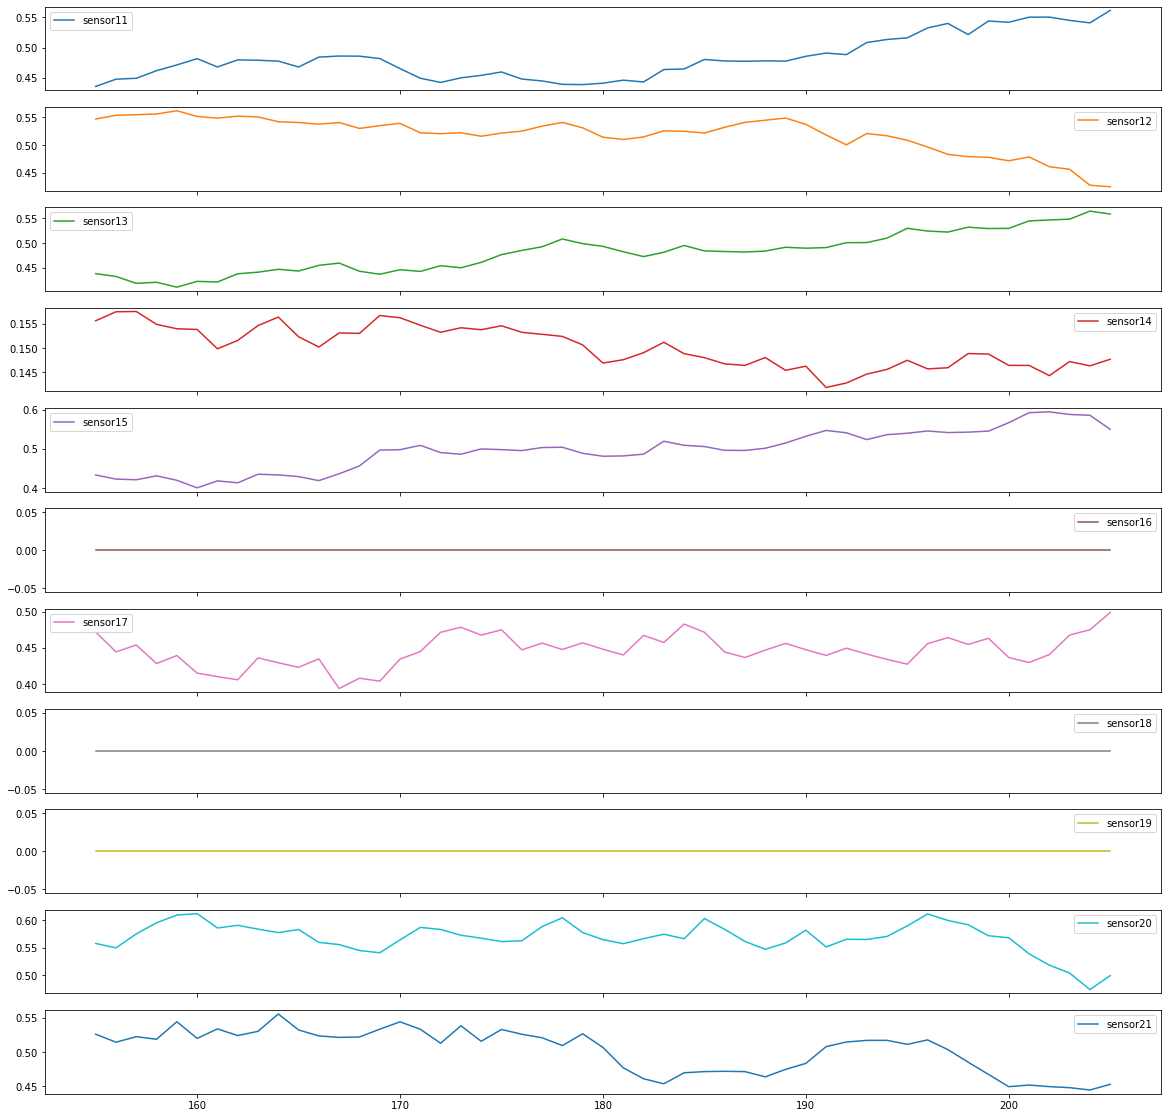

In [34]:
# plotting sensor data for engine ID 3 prior to a failure point - sensors 11-21 
ax2 = engine_id3_50cycleWindow2.plot(subplots=True, sharex=True, figsize=(20,20))

In [35]:
# function to reshape features into (samples, time steps, features) 
def gen_sequence(id_df, seq_length, seq_cols):
    """ Only sequences that meet the window-length are considered, no padding is used. This means for testing
    we need to drop those which are below the window-length. An alternative would be to pad sequences so that
    we can use shorter ones """
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield data_array[start:stop, :]

In [36]:
# pick the feature columns 
sensor_cols = ['sensor' + str(i) for i in range(1,22)]
sequence_cols = ['opSetting1', 'opSetting2', 'opSetting3', 'cycle_norm']
sequence_cols.extend(sensor_cols)

In [37]:
# generator for the sequences
seq_gen = (list(gen_sequence(train_df[train_df['engineNumber']==engineNumber], sequence_length, sequence_cols)) 
           for engineNumber in train_df['engineNumber'].unique())

In [38]:
# generate sequences and convert to numpy array
seq_array = np.concatenate(list(seq_gen)).astype(np.float32)
seq_array.shape

(15631, 50, 25)

In [39]:
# function to generate labels
def gen_labels(id_df, seq_length, label):
    data_array = id_df[label].values
    num_elements = data_array.shape[0]
    return data_array[seq_length:num_elements, :]

In [40]:
# generate labels
label_gen = [gen_labels(train_df[train_df['engineNumber']==engineNumber], sequence_length, ['RUL']) 
             for engineNumber in train_df['engineNumber'].unique()]
label_array = np.concatenate(label_gen).astype(np.float32)
label_array.shape

(15631, 1)

In [41]:
# build the network
nb_features = seq_array.shape[2]
nb_out = label_array.shape[1]

model = Sequential()
model.add(LSTM(
         units=100,
         return_sequences=True,
         input_shape=(sequence_length, nb_features)))
model.add(Dropout(0.4))

model.add(LSTM(
          units=100,
          return_sequences=False))
model.add(Dropout(0.4))


model.add(Dense(units=1, activation='relu'))
model.add(Activation("relu"))
model.compile(loss="mse", optimizer="rmsprop", metrics=['mse'])

In [42]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 100)           50400     
                                                                 
 dropout (Dropout)           (None, 50, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 130,901
Trainable params: 130,901
Non-trai

In [43]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

STAMP = 'predictive_regression_kalhman'
print(STAMP)

early_stopping =EarlyStopping(monitor='val_loss', patience=10)
bst_model_path = STAMP + '.h5'
model_checkpoint = ModelCheckpoint(bst_model_path, save_best_only=True, save_weights_only=True)

predictive_regression_kalhman


In [44]:
%%time
# fit the network
hist = model.fit(seq_array, label_array, epochs=1000, batch_size=200, validation_split=0.05, verbose=1,callbacks=[early_stopping, model_checkpoint])

Epoch 1/1000
75/75 [==============================] - 15s 151ms/step - loss: 8139.2539 - mse: 8139.2539 - val_loss: 7303.6968 - val_mse: 7303.6963
Epoch 2/1000
75/75 [==============================] - 10s 138ms/step - loss: 7012.8726 - mse: 7012.8726 - val_loss: 6396.6533 - val_mse: 6396.6533
Epoch 3/1000
75/75 [==============================] - 9s 118ms/step - loss: 6168.1338 - mse: 6168.1338 - val_loss: 5615.1865 - val_mse: 5615.1865
Epoch 4/1000
75/75 [==============================] - 9s 117ms/step - loss: 5428.9917 - mse: 5428.9912 - val_loss: 4941.5015 - val_mse: 4941.5015
Epoch 5/1000
75/75 [==============================] - 9s 121ms/step - loss: 4817.3477 - mse: 4817.3477 - val_loss: 4377.1338 - val_mse: 4377.1338
Epoch 6/1000
75/75 [==============================] - 12s 159ms/step - loss: 4296.0015 - mse: 4296.0010 - val_loss: 3925.5559 - val_mse: 3925.5559
Epoch 7/1000
75/75 [==============================] - 10s 133ms/step - loss: 3899.8940 - mse: 3899.8940 - val_loss: 3583.

In [45]:
model.load_weights(bst_model_path)

In [46]:
# training metrics
scores = model.evaluate(seq_array, label_array, verbose=1, batch_size=200)
print('Score: {}'.format(scores[1]))

79/79 [==============================] - 7s 84ms/step - loss: 1725.4781 - mse: 1725.4781
Score: 1725.4781494140625


In [47]:
seq_array_test_last = [test_df[test_df['engineNumber']==engineNumber][sequence_cols].values[-sequence_length:] 
                       for engineNumber in test_df['engineNumber'].unique() if len(test_df[test_df['engineNumber']==engineNumber]) >= sequence_length]

seq_array_test_last = np.asarray(seq_array_test_last).astype(np.float32)
seq_array_test_last.shape

(93, 50, 25)

In [48]:
y_mask = [len(test_df[test_df['engineNumber']==engineNumber]) >= sequence_length for engineNumber in test_df['engineNumber'].unique()]

In [49]:
label_array_test_last = test_df.groupby('engineNumber')['RUL'].nth(-1)[y_mask].values
label_array_test_last = label_array_test_last.reshape(label_array_test_last.shape[0],1).astype(np.float32)
label_array_test_last.shape

(93, 1)

In [50]:
print(seq_array_test_last.shape)
print(label_array_test_last.shape)

(93, 50, 25)
(93, 1)


In [51]:
# test metrics
import math
scores_test = model.evaluate(seq_array_test_last, label_array_test_last, verbose=2)
print('Test Score: %.2f MSE (%.2f RMSE)' % (scores_test[0], math.sqrt(scores_test[0])))

3/3 - 0s - loss: 1725.0602 - mse: 1725.0602 - 96ms/epoch - 32ms/step
Test Score: 1725.06 MSE (41.53 RMSE)


In [52]:
pred = model.predict(seq_array_test_last)
pred

3/3 [==============================] - 2s 29ms/step


array([[ 96.38578 ],
       [102.82058 ],
       [125.569824],
       [149.24075 ],
       [121.10307 ],
       [164.34938 ],
       [162.83553 ],
       [118.92716 ],
       [136.55055 ],
       [126.57052 ],
       [121.16585 ],
       [176.22044 ],
       [156.9419  ],
       [ 61.632767],
       [ 59.894424],
       [150.24834 ],
       [ 34.176674],
       [ 85.009766],
       [189.677   ],
       [ 27.703808],
       [171.31447 ],
       [128.96214 ],
       [146.84009 ],
       [115.66248 ],
       [103.84362 ],
       [ 16.370697],
       [ 68.802704],
       [137.44916 ],
       [ 24.065765],
       [ 20.613562],
       [ 38.64981 ],
       [ 61.26689 ],
       [ 71.43246 ],
       [ 47.055176],
       [ 55.13115 ],
       [ 36.72635 ],
       [ 99.21823 ],
       [171.90602 ],
       [111.499695],
       [ 54.921875],
       [165.61125 ],
       [152.7088  ],
       [ 41.794327],
       [135.32336 ],
       [149.49815 ],
       [ 31.492107],
       [ 44.075806],
       [147.3

In [53]:
diff = []
ratio = []
pred = model.predict(seq_array_test_last)
for u in range(len(label_array_test_last)):
    pr = pred[u][0]
    ratio.append((label_array_test_last[u] / pr) - 1)
    diff.append(abs(label_array_test_last[u] - pr))

3/3 [==============================] - 0s 20ms/step


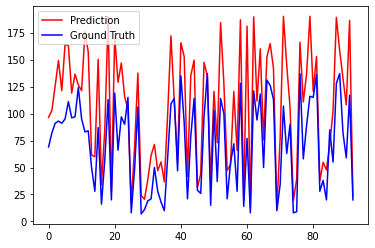

In [54]:
import matplotlib.pyplot as plt

plt.plot(pred, color='red', label='Prediction')
plt.plot(label_array_test_last, color='blue', label='Ground Truth')
plt.legend(loc='upper left')
plt.show()

In [55]:
error = pd.DataFrame((label_array_test_last - pred),columns=['error'])
error.describe()

,error
count,93.000000
mean,-33.689693
std,24.422894
min,-103.942474
25%,-50.351562
50%,-28.637619
75%,-17.391586
max,13.880249
